# REPRESENTATION

### IMPORT DEPENDENCIES

In [47]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import random
from config import dbuser, dbpassword, dbhost, dbport, dbname
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

In [48]:
# =============================================================== #
# IMPORTING DATA
# =============================================================== #
path1 = os.path.join('data',f'CountriesPopulation_v1.csv')
path2 = os.path.join('data',f'OECD_Countries.csv')
path3 = os.path.join('data',f'Large_Countries.csv')
path4 = os.path.join('data',f'USStatesCongressionalSeats.csv')
path5 = os.path.join('data',f'USStatesCongressionalSeatsHistory.csv')
path6 = os.path.join('data',f'USStatesPopulation.csv')
path7 = os.path.join('data',f'USStatesPopulationHistoric.csv')

In [49]:
# =============================================================== #
# CONVERTING TO DATAFRAMES
# =============================================================== #
CountriesPopulation_df = pd.read_csv(path1, encoding = "ISO-8859-1")
OECD_Countries_df = pd.read_csv(path2, encoding = "ISO-8859-1")
Large_Countries_df = pd.read_csv(path3, encoding = "ISO-8859-1")
USStatesCongressionalSeats_df = pd.read_csv(path4, encoding = "ISO-8859-1")
USStatesCongressionalSeatsHistory_df = pd.read_csv(path5, encoding = "ISO-8859-1")
USStatesPopulation_df = pd.read_csv(path6, encoding = "ISO-8859-1")
USStatesPopulationHistoric_df = pd.read_csv(path7, encoding = "ISO-8859-1")

In [50]:
CountriesPopulation_df.head()

,Country,Population,countrycode_2,countrycode,Independent
0,Afghanistan,32890171.0,AF,AFG,Yes
1,Aland Islands (Finland),30152.0,AX,ALA,No
2,Albania,2845955.0,AL,ALB,Yes
3,Algeria,44700000.0,DZ,DZA,Yes
4,American Samoa (US),56951.0,AS,ASM,No


### PART 1A REPRESENTATION US VS OECD COUNTRIES

In [51]:
# =============================================================== #
# Combine the data into a single dataset
# =============================================================== #
OECDCountriesPopCongressionalSeats_df = pd.merge(CountriesPopulation_df, OECD_Countries_df, how='left', on='countrycode')

# =============================================================== #
# Getting rid of columns we don't need
# =============================================================== #
OECDCountriesPopCongressionalSeats_df = OECDCountriesPopCongressionalSeats_df[['Country', 'countrycode', 'Population', 'federal representatives', 'upper house']]

# =============================================================== #
# Renaming columns
# =============================================================== #
OECDCountriesPopCongressionalSeats_df = OECDCountriesPopCongressionalSeats_df.rename(columns={'federal representatives': 'LHR', 'upper house': 'UHR', 'countrycode': 'countryCode'})

# =============================================================== #
# Remove any blanks, reset
# =============================================================== #
OECDCountriesPopCongressionalSeats_df = OECDCountriesPopCongressionalSeats_df.dropna(how='any')
OECDCountriesPopCongressionalSeats_df.reset_index()
OECDCountriesPopCongressionalSeats_df
# print(CountriesPopulationCongressionalSeats_df.dtypes)

# =============================================================== #
# Convert object to numeric
# =============================================================== #
OECDCountriesPopCongressionalSeats_df['Population'] = OECDCountriesPopCongressionalSeats_df['Population'].apply(pd.to_numeric, errors='coerce')

# =============================================================== #
# Round numbers
# =============================================================== #
OECDCountriesPopCongressionalSeats_df['Population'] = round(OECDCountriesPopCongressionalSeats_df['Population'], 0)
OECDCountriesPopCongressionalSeats_df['LHR'] = round(OECDCountriesPopCongressionalSeats_df['LHR'], 0)
OECDCountriesPopCongressionalSeats_df['UHR'] = round(OECDCountriesPopCongressionalSeats_df['UHR'], 0)

print(OECDCountriesPopCongressionalSeats_df.dtypes)
OECDCountriesPopCongressionalSeats_df.head()

Country         object
countryCode     object
Population     float64
LHR            float64
UHR            float64
dtype: object


,Country,countryCode,Population,LHR,UHR
12,Australia,AUS,25776464.0,151.0,76.0
13,Austria,AUT,8933346.0,183.0,61.0
20,Belgium,BEL,11556297.0,150.0,60.0
36,Canada,CAN,38411882.0,338.0,105.0
41,Chile,CHL,19678363.0,155.0,43.0


In [52]:
# =============================================================== #
# Calculate LHCPR (Lower House Citizens per Representative) and UHCPR (Upper House Citizens per Representative)
# =============================================================== #
for index, row in OECDCountriesPopCongressionalSeats_df.iterrows():
    OECDCountriesPopCongressionalSeats_df.loc[index,"CPRLH"] = row["Population"] / row["LHR"]
    if OECDCountriesPopCongressionalSeats_df.loc[index,"UHR"] > 0:
        OECDCountriesPopCongressionalSeats_df.loc[index,"CPRUH"] = row["Population"] / row["UHR"]
    else:
        OECDCountriesPopCongressionalSeats_df.loc[index,"CPRUH"] = 0
    
# =============================================================== #
# Round numbers
# =============================================================== #
OECDCountriesPopCongressionalSeats_df['Population'] = round(OECDCountriesPopCongressionalSeats_df['Population'], 0)
OECDCountriesPopCongressionalSeats_df['CPRLH'] = round(OECDCountriesPopCongressionalSeats_df['CPRLH'], 0)
OECDCountriesPopCongressionalSeats_df['CPRUH'] = round(OECDCountriesPopCongressionalSeats_df['CPRUH'], 0)

# =============================================================== #
# Add in Group column
# =============================================================== #
OECDCountriesPopCongressionalSeats_df['Group'] = "OECD Countries"

OECDCountriesPopCongressionalSeats_df.head(50)

,Country,countryCode,Population,LHR,UHR,CPRLH,CPRUH,Group
12,Australia,AUS,25776464.0,151.0,76.0,170705.0,339164.0,OECD Countries
13,Austria,AUT,8933346.0,183.0,61.0,48816.0,146448.0,OECD Countries
20,Belgium,BEL,11556297.0,150.0,60.0,77042.0,192605.0,OECD Countries
36,Canada,CAN,38411882.0,338.0,105.0,113645.0,365827.0,OECD Countries
41,Chile,CHL,19678363.0,155.0,43.0,126957.0,457636.0,OECD Countries
54,Czech Republic,CZE,10701777.0,200.0,81.0,53509.0,132121.0,OECD Countries
55,Denmark,DNK,5840045.0,179.0,0.0,32626.0,0.0,OECD Countries
66,Estonia,EST,1329460.0,101.0,0.0,13163.0,0.0,OECD Countries
72,Finland,FIN,5508198.0,200.0,0.0,27541.0,0.0,OECD Countries
73,France,FRA,67399000.0,577.0,348.0,116809.0,193675.0,OECD Countries


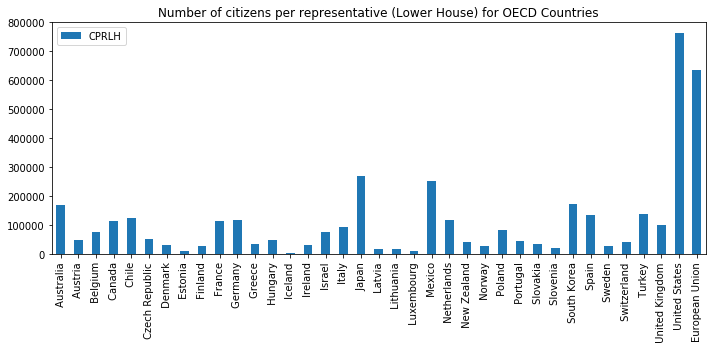

In [53]:
# =============================================================== #
# GENERATE BAR PLOT FOR LOWER HOUSE
# =============================================================== #
# Getting rid of columns we don't need
# =============================================================== #
CountryvsSeats_LowerHouse_df = OECDCountriesPopCongressionalSeats_df[['Country', 'CPRLH']]
# Create x-axis
Country_List = CountryvsSeats_LowerHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# =============================================================== #
# Create Plot Method 1 (pandasplot)
# =============================================================== #
CountryvsSeats_LowerHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Number of citizens per representative (Lower House) for OECD Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()

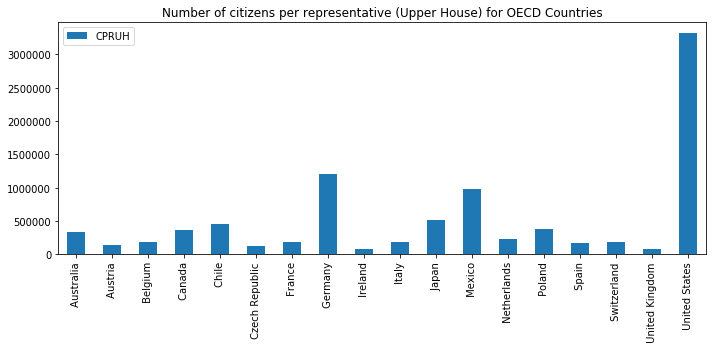

In [54]:
# =============================================================== #
# GENERATE BAR PLOT FOR UPPER HOUSE
# =============================================================== #
# Getting rid of columns we don't need
# =============================================================== #
UpperHouse_df = OECDCountriesPopCongressionalSeats_df[OECDCountriesPopCongressionalSeats_df['UHR']>0] 
CountryvsSeats_UpperHouse_df = UpperHouse_df[['Country', 'CPRUH']]

# =============================================================== #
# Create x-axis
# =============================================================== #
Country_List = CountryvsSeats_UpperHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# =============================================================== #
# Create Plot Method 1 (pandasplot)
# =============================================================== #
CountryvsSeats_UpperHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Number of citizens per representative (Upper House) for OECD Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()

#### PART 1B: REPRESENTATION US VS RANDOM COUNTRIES

In [55]:
# =============================================================== #
# Combine the data into a single dataset
# =============================================================== #
CountriesPopulationCongressionalSeats_df = pd.merge(CountriesPopulation_df, Large_Countries_df, how='left', on='countrycode')

# =============================================================== #
# Getting rid of columns we don't need
# =============================================================== #
CountriesPopulationCongressionalSeats_df = CountriesPopulationCongressionalSeats_df[['Country', 'countrycode', 'Population_x', 'Federal Representatives', 'Upper house']]

# =============================================================== #
# Renaming columns
# =============================================================== #
CountriesPopulationCongressionalSeats_df = CountriesPopulationCongressionalSeats_df.rename(columns={'Population_x': 'Population', 'Federal Representatives': 'LHR', 'Upper house': 'UHR', 'countrycode': 'countryCode'})

# =============================================================== #
# Remove any blanks, reset
# =============================================================== #
CountriesPopulationCongressionalSeats_df = CountriesPopulationCongressionalSeats_df.dropna(how='any')
CountriesPopulationCongressionalSeats_df.reset_index()
CountriesPopulationCongressionalSeats_df
# print(CountriesPopulationCongressionalSeats_df.dtypes)

# =============================================================== #
# Convert object to numeric
# =============================================================== #
CountriesPopulationCongressionalSeats_df['Population'] = CountriesPopulationCongressionalSeats_df['Population'].apply(pd.to_numeric, errors='coerce')

# =============================================================== #
# Round numbers
# =============================================================== #
CountriesPopulationCongressionalSeats_df['Population'] = round(CountriesPopulationCongressionalSeats_df['Population'], 0)
CountriesPopulationCongressionalSeats_df['LHR'] = round(CountriesPopulationCongressionalSeats_df['LHR'], 0)
CountriesPopulationCongressionalSeats_df['UHR'] = round(CountriesPopulationCongressionalSeats_df['UHR'], 0)

print(CountriesPopulationCongressionalSeats_df.dtypes)
CountriesPopulationCongressionalSeats_df.head()

Country         object
countryCode     object
Population     float64
LHR            float64
UHR            float64
dtype: object


,Country,countryCode,Population,LHR,UHR
3,Algeria,DZA,44700000.0,462.0,144.0
8,Antigua and Barbuda,ATG,99337.0,17.0,17.0
9,Argentina,ARG,45808747.0,257.0,72.0
15,Bahamas,BHS,393450.0,39.0,16.0
16,Bahrain,BHR,1501635.0,40.0,40.0


In [56]:
# =============================================================== #
# Calculate LHCPR (Lower House Citizens per Representative) and UHCPR (Upper House Citizens per Representative)
# =============================================================== #
for index, row in CountriesPopulationCongressionalSeats_df.iterrows():
    CountriesPopulationCongressionalSeats_df.loc[index,"CPRLH"] = row["Population"] / row["LHR"]
    if CountriesPopulationCongressionalSeats_df.loc[index,"UHR"] > 0:
        CountriesPopulationCongressionalSeats_df.loc[index,"CPRUH"] = row["Population"] / row["UHR"]
    else:
        CountriesPopulationCongressionalSeats_df.loc[index,"CPRUH"] = 0

# =============================================================== #
# Round numbers
# =============================================================== #
CountriesPopulationCongressionalSeats_df['Population'] = round(CountriesPopulationCongressionalSeats_df['Population'], 0)
CountriesPopulationCongressionalSeats_df['CPRLH'] = round(CountriesPopulationCongressionalSeats_df['CPRLH'], 0)
CountriesPopulationCongressionalSeats_df['CPRUH'] = round(CountriesPopulationCongressionalSeats_df['CPRUH'], 0)

# =============================================================== #
# Add in Group column
# =============================================================== #
CountriesPopulationCongressionalSeats_df['Group'] = "Random Countries"

CountriesPopulationCongressionalSeats_df.head(50)

,Country,countryCode,Population,LHR,UHR,CPRLH,CPRUH,Group
3,Algeria,DZA,4.470000e+07,462.0,144.0,96753.0,310417.0,Random Countries
8,Antigua and Barbuda,ATG,9.933700e+04,17.0,17.0,5843.0,5843.0,Random Countries
9,Argentina,ARG,4.580875e+07,257.0,72.0,178244.0,636233.0,Random Countries
15,Bahamas,BHS,3.934500e+05,39.0,16.0,10088.0,24591.0,Random Countries
16,Bahrain,BHR,1.501635e+06,40.0,40.0,37541.0,37541.0,Random Countries
17,Bangladesh,BGD,1.704535e+08,350.0,0.0,487010.0,0.0,Random Countries
28,Brazil,BRA,2.129695e+08,513.0,81.0,415145.0,2629253.0,Random Countries
30,Brunei,BRN,4.595000e+05,33.0,0.0,13924.0,0.0,Random Countries
42,China,CHN,1.407403e+09,2980.0,0.0,472283.0,0.0,Random Countries
51,Cuba,CUB,1.119347e+07,605.0,0.0,18502.0,0.0,Random Countries


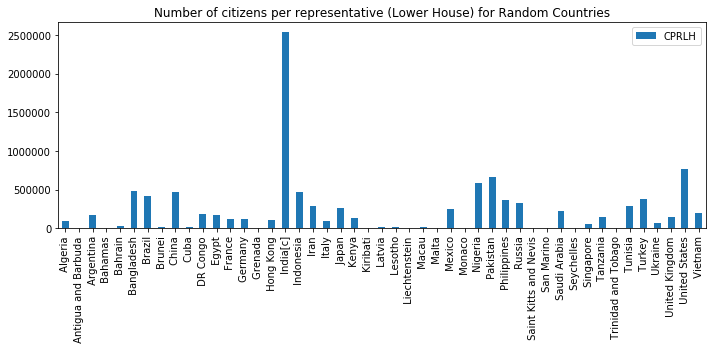

In [57]:
# =============================================================== #
# GENERATE BAR PLOT FOR LOWER HOUSE
# =============================================================== #
# Getting rid of columns we don't need
# =============================================================== #
CountryvsSeats_LowerHouse_df = CountriesPopulationCongressionalSeats_df[['Country', 'CPRLH']]

# =============================================================== #
# Create x-axis
# =============================================================== #
Country_List = CountryvsSeats_LowerHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# =============================================================== #
# Create Plot Method 1 (pandasplot)
# =============================================================== #
CountryvsSeats_LowerHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Number of citizens per representative (Lower House) for Random Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()

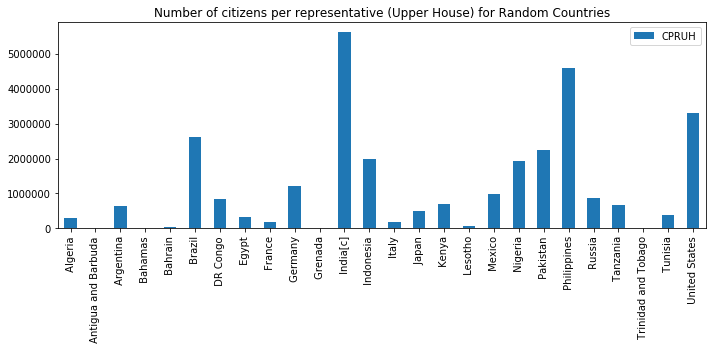

In [58]:
# =============================================================== #
# GENERATE BAR PLOT FOR UPPER HOUSE
# =============================================================== #
# Getting rid of columns we don't need
# =============================================================== #
UpperHouse_df = CountriesPopulationCongressionalSeats_df[CountriesPopulationCongressionalSeats_df['UHR']>0] 
CountryvsSeats_UpperHouse_df = UpperHouse_df[['Country', 'CPRUH']]

# =============================================================== #
# Create x-axis
# =============================================================== #
Country_List = CountryvsSeats_UpperHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# =============================================================== #
# Create Plot Method 1 (pandasplot)
# =============================================================== #
CountryvsSeats_UpperHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Number of citizens per representative (Upper House) for Random Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()

In [59]:
#### MERGE, REMOVE UNWANTED COUNTRIES AND OUTPUT CSV FOR PART1

In [60]:
# =============================================================== #
### MERGE, REMOVE UNWANTED COUNTRIES AND OUTPUT CSV FOR PART1
# =============================================================== #
# CONCATENATE THE CSVs
# =============================================================== #
Part1_df= pd.concat([OECDCountriesPopCongressionalSeats_df, CountriesPopulationCongressionalSeats_df])

# =============================================================== #
# DELETE UNWANTED ROWS (COUNTRIES)
# =============================================================== #
countriesToDelete = ['CHN', 'EUR', 'IND' ]

n = 0
for country in countriesToDelete:
    deleteRows = Part1_df[Part1_df['countryCode'] == countriesToDelete[n] ].index
    # dfObj.drop(indexNames , inplace=True)
    Part1_df.drop(deleteRows, inplace=True)
    n = n + 1

# =============================================================== #
# SAVE THE CSV
# =============================================================== #
Part1_df.to_csv("data/Part1.csv", index = False)
Part1_df.to_csv("03_metalRoute/Part1.csv", index = False)
Part1_df

,Country,countryCode,Population,LHR,UHR,CPRLH,CPRUH,Group
12,Australia,AUS,25776464.0,151.0,76.0,170705.0,339164.0,OECD Countries
13,Austria,AUT,8933346.0,183.0,61.0,48816.0,146448.0,OECD Countries
20,Belgium,BEL,11556297.0,150.0,60.0,77042.0,192605.0,OECD Countries
36,Canada,CAN,38411882.0,338.0,105.0,113645.0,365827.0,OECD Countries
41,Chile,CHL,19678363.0,155.0,43.0,126957.0,457636.0,OECD Countries
...,...,...,...,...,...,...,...,...
214,Turkey,TUR,83614362.0,217.0,0.0,385320.0,0.0,Random Countries
220,Ukraine,UKR,41554836.0,600.0,0.0,69258.0,0.0,Random Countries
222,United Kingdom,GBR,66796807.0,450.0,0.0,148437.0,0.0,Random Countries
223,United States,USA,331458869.0,435.0,100.0,761974.0,3314589.0,Random Countries


In [69]:
# =============================================================== #
# # # FLASK APP TESTING FOR PART 1
# =============================================================== #
# Make a copy
repData = Part1_df
# Inputs that'll come from user
countries = 'OECD'
house = 'Lower House'

##### Code to get the Dataset needed for graph #####
##### If statement for Country group selection #####
if countries == 'OECD':
    countryGroup1 = 'OECD Countries'
    countryGroup2 = 'OECD Countries'
elif countries == 'RANDOM':
    countryGroup1 = 'Random Countries'
    countryGroup2 = 'Random Countries'
else:
    countryGroup1 = 'OECD Countries'
    countryGroup2 = 'Random Countries'
    
##### If statement for House selection #####
if house == 'Upper House':
    colofInterest1 = 'CPRUH'
    colofInterest2 = 'UHR'
else:
    colofInterest1 = 'CPRLH'
    colofInterest2 = 'LHR'

##### Sort dataframe by countries & house & select columns to keep #####
barGraphData=repData[(repData["Group"] == countryGroup1) | (repData["Group"] == countryGroup2)]

##### Filter for data that isn't 0 #####
barGraphData=barGraphData[barGraphData[colofInterest1] != 0]

##### Sort data by Column of Interest #####
sortedBarGraphData = barGraphData.sort_values(by=colofInterest1)

##### Select columns you want for output #####
sortedBarGraphData=sortedBarGraphData[["Country", "countryCode", "Population", colofInterest1, colofInterest2]]

##### Renaming columns #####
Part1b_df = sortedBarGraphData.rename(columns={'Country': 'country', 'countryCode': 'countryCode', 'Population': 'population', colofInterest1: 'cpr', colofInterest2: 'reps'})


# =============================================================== #
# SAVE CSV TO TEST FOLDER
# =============================================================== #
Part1b_df.to_csv("01_barchartRoute/Part1c.csv", index = False)
Part1b_df

,country,countryCode,population,cpr,reps
94,Iceland,ISL,368590.0,5851.0,63.0
121,Luxembourg,LUX,634730.0,10579.0,60.0
66,Estonia,EST,1329460.0,13163.0,101.0
114,Latvia,LVA,1891300.0,18913.0,100.0
120,Lithuania,LTU,2790044.0,19788.0,141.0
191,Slovenia,SVN,2111461.0,23461.0,90.0
155,Norway,NOR,5391369.0,27507.0,196.0
72,Finland,FIN,5508198.0,27541.0,200.0
202,Sweden,SWE,10380491.0,29744.0,349.0
99,Ireland,IRL,4977400.0,31109.0,160.0


In [ ]:
# =============================================================== #
# # # UPLOAD DATASET TO DATABASE (POSTGRESS SQL DB)
# =============================================================== #
# # You first have to go create the db and then use the same name as the db you have created
# =============================================================== #

# =============================================================== #
# # 1 Connect to Database (Alternative with AWS db and all)
# =============================================================== #
# connection_string = f'{dbuser}:{dbpassword}@database-1.cvmfiiilpm7y.us-east-1.rds.amazonaws.com:{dbport}/{dbname}'
# engine=create_engine(f'postgresql://{connection_string}')

# =============================================================== #
# # 2 Upload to postgres
# =============================================================== #
# Part1_df.to_sql(name='Part1_table',con=engine,if_exists='append',index=False)

### PART 2: US POPULATION HISTORY AND CONGRESSIONAL SEATS

In [69]:
USStatesPopulationHistoric_df

,State,Abbr,Year Admitted,1790_TotalPopulation,1800_TotalPopulation,1810_TotalPopulation,1820_TotalPopulation,1830_TotalPopulation,1840_TotalPopulation,1850_TotalPopulation,...,1950_TotalPopulation,1960_TotalPopulation,1970_TotalPopulation,1980_TotalPopulation,1990_TotalPopulation,2000_TotalPopulation,2010_TotalPopulation,2018_TotalPopulation,2020_TotalPopulation,density
0,Alabama,AL,1819.0,NaN,"1,250","9,046","127,901","309,527","590,756","771,623",...,"3,061,743","3,266,740","3,444,165","3,893,888","4,040,587","4,447,100","4,779,736","4,934,190.00",5024279.0,97.4270
1,Alaska,AK,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"128,643","226,167","300,382","401,851","550,043","626,932","710,231","724,357.00",733391.0,1.2694
2,Arizona,AZ,1912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"749,587","1,302,161","1,770,900","2,718,215","3,665,228","5,130,632","6,392,017","7,520,100.00",7151502.0,66.2016
3,Arkansas,AR,1836.0,NaN,NaN,"1,062","14,273","30,388","97,574","209,897",...,"1,909,511","1,786,272","1,923,295","2,286,435","2,350,725","2,673,400","2,915,918","3,033,950.00",3011524.0,58.3059
4,California,CA,1850.0,NaN,NaN,NaN,NaN,NaN,NaN,"92,597",...,"10,586,223","15,717,204","19,953,134","23,667,902","29,760,021","33,871,648","37,253,956","39,613,500.00",39538223.0,254.2929
5,Colorado,CO,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,325,089","1,753,947","2,207,259","2,889,964","3,294,394","4,301,261","5,029,196","5,893,630.00",5773714.0,56.8653
6,Connecticut,CT,1788.0,"237,946","251,002","262,042","275,202","297,675","309,978","370,792",...,"2,007,280","2,535,234","3,031,709","3,107,576","3,287,116","3,405,565","3,574,097","3,552,820.00",3605944.0,733.7505
7,Delaware,DE,1787.0,"59,096","64,273","72,674","72,749","76,748","78,085","91,532",...,"318,085","446,292","548,104","594,338","666,168","783,600","897,934","990,334.00",989948.0,508.1242
8,District of Columbia,DC,1790.0,NaN,"8,144","15,471","23,336","30,261","33,745","51,687",...,"802,178","763,956","756,510","638,333","606,900","572,059","601,723","714,153.00",689545.0,11707.4262
9,Florida,FL,1845.0,NaN,NaN,NaN,NaN,"34,730","54,477","87,445",...,"2,771,305","4,951,560","6,789,443","9,746,324","12,937,926","15,982,378","18,801,310","21,944,600.00",21538187.0,409.2233


In [70]:
# USStatesPopulationHistoric_df = USStatesPopulationHistoric_df.dropna(how='any')
# USStatesPopulationHistoric_df = USStatesPopulationHistoric_df[~USStatesPopulationHistoric_df['1790_TotalPopulation'].str.contains("NaN", na=False)]
USStatesPopulationHistoric_df.fillna(0)

,State,Abbr,Year Admitted,1790_TotalPopulation,1800_TotalPopulation,1810_TotalPopulation,1820_TotalPopulation,1830_TotalPopulation,1840_TotalPopulation,1850_TotalPopulation,...,1950_TotalPopulation,1960_TotalPopulation,1970_TotalPopulation,1980_TotalPopulation,1990_TotalPopulation,2000_TotalPopulation,2010_TotalPopulation,2018_TotalPopulation,2020_TotalPopulation,density
0,Alabama,AL,1819.0,0,"1,250","9,046","127,901","309,527","590,756","771,623",...,"3,061,743","3,266,740","3,444,165","3,893,888","4,040,587","4,447,100","4,779,736","4,934,190.00",5024279.0,97.4270
1,Alaska,AK,1959.0,0,0,0,0,0,0,0,...,"128,643","226,167","300,382","401,851","550,043","626,932","710,231","724,357.00",733391.0,1.2694
2,Arizona,AZ,1912.0,0,0,0,0,0,0,0,...,"749,587","1,302,161","1,770,900","2,718,215","3,665,228","5,130,632","6,392,017","7,520,100.00",7151502.0,66.2016
3,Arkansas,AR,1836.0,0,0,"1,062","14,273","30,388","97,574","209,897",...,"1,909,511","1,786,272","1,923,295","2,286,435","2,350,725","2,673,400","2,915,918","3,033,950.00",3011524.0,58.3059
4,California,CA,1850.0,0,0,0,0,0,0,"92,597",...,"10,586,223","15,717,204","19,953,134","23,667,902","29,760,021","33,871,648","37,253,956","39,613,500.00",39538223.0,254.2929
5,Colorado,CO,1876.0,0,0,0,0,0,0,0,...,"1,325,089","1,753,947","2,207,259","2,889,964","3,294,394","4,301,261","5,029,196","5,893,630.00",5773714.0,56.8653
6,Connecticut,CT,1788.0,"237,946","251,002","262,042","275,202","297,675","309,978","370,792",...,"2,007,280","2,535,234","3,031,709","3,107,576","3,287,116","3,405,565","3,574,097","3,552,820.00",3605944.0,733.7505
7,Delaware,DE,1787.0,"59,096","64,273","72,674","72,749","76,748","78,085","91,532",...,"318,085","446,292","548,104","594,338","666,168","783,600","897,934","990,334.00",989948.0,508.1242
8,District of Columbia,DC,1790.0,0,"8,144","15,471","23,336","30,261","33,745","51,687",...,"802,178","763,956","756,510","638,333","606,900","572,059","601,723","714,153.00",689545.0,11707.4262
9,Florida,FL,1845.0,0,0,0,0,"34,730","54,477","87,445",...,"2,771,305","4,951,560","6,789,443","9,746,324","12,937,926","15,982,378","18,801,310","21,944,600.00",21538187.0,409.2233


In [71]:
# for index, row in USStatesPopulationHistoric_df.iterrows():
#     USStatesPopulationHistoric_df.loc[index,"1790_RepPopulation"] = row["1790_TotalPopulation"] +(0.60 * (row["1790_EnslavedPopulation"]))
# #     if CountriesPopulationCongressionalSeats_df.loc[index,"upper house"] != NaN:
# #         CountriesPopulationCongressionalSeats_df.loc[index,"upper_house per head"] = row["Population"] / row["upper house"]
# USStatesPopulationHistoric_df

# spare_df = USStatesPopulationHistoric_df
# USStatesPopulationHistoric_df = spare_df
USStatesPopulationHistoric_df

# Remove NaN values
# USStatesPopulationHistoric_df.fillna(0)
New_USStatesPopulationHistoric_df = USStatesPopulationHistoric_df.replace(np.nan,0)
###################################################################################################################################################################
# Convert object to numeric
# weather["Temp"] = pd.to_numeric(weather.Temp, errors='coerce')
# New_USStatesPopulationHistoric_df["1790_TotalPopulation"] = pd.to_numeric(New_USStatesPopulationHistoric_df["1790_TotalPopulation"], errors='coerce')
# New_USStatesPopulationHistoric_df = New_USStatesPopulationHistoric_df.apply(pd.to_numeric, errors='coerce')
# New_USStatesPopulationHistoric_df['State'] = New_USStatesPopulationHistoric_df['State'].astype(str)
# New_USStatesPopulationHistoric_df['Abbr'] = New_USStatesPopulationHistoric_df['Abbr'].astype(str)

# # USStatesPopulationHistoric_df = USStatesPopulationHistoric_df.dropna(how='any')
# New_USStatesPopulationHistoric_df["1790_RepPopulation"] = New_USStatesPopulationHistoric_df["1790_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1790_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1800_RepPopulation"] = New_USStatesPopulationHistoric_df["1800_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1800_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1810_RepPopulation"] = New_USStatesPopulationHistoric_df["1810_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1810_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1820_RepPopulation"] = New_USStatesPopulationHistoric_df["1820_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1820_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1830_RepPopulation"] = New_USStatesPopulationHistoric_df["1830_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1830_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1840_RepPopulation"] = New_USStatesPopulationHistoric_df["1840_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1840_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1850_RepPopulation"] = New_USStatesPopulationHistoric_df["1850_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1850_EnslavedPopulation"]))
# New_USStatesPopulationHistoric_df["1860_RepPopulation"] = New_USStatesPopulationHistoric_df["1860_TotalPopulation"] +(0.60 * (New_USStatesPopulationHistoric_df["1860_EnslavedPopulation"]))
print(New_USStatesPopulationHistoric_df.dtypes)
New_USStatesPopulationHistoric_df

State                       object
Abbr                        object
Year Admitted              float64
1790_TotalPopulation        object
1800_TotalPopulation        object
1810_TotalPopulation        object
1820_TotalPopulation        object
1830_TotalPopulation        object
1840_TotalPopulation        object
1850_TotalPopulation        object
1860_TotalPopulation        object
1790_EnslavedPopulation     object
1800_EnslavedPopulation     object
1810_EnslavedPopulation     object
1820_EnslavedPopulation     object
1830_EnslavedPopulation     object
1840_EnslavedPopulation     object
1850_EnslavedPopulation     object
1860_EnslavedPopulation     object
1870_TotalPopulation        object
1880_TotalPopulation        object
1890_TotalPopulation        object
1900_TotalPopulation        object
1910_TotalPopulation        object
1920_TotalPopulation        object
1930_TotalPopulation        object
1940_TotalPopulation        object
1950_TotalPopulation        object
1960_TotalPopulation

,State,Abbr,Year Admitted,1790_TotalPopulation,1800_TotalPopulation,1810_TotalPopulation,1820_TotalPopulation,1830_TotalPopulation,1840_TotalPopulation,1850_TotalPopulation,...,1950_TotalPopulation,1960_TotalPopulation,1970_TotalPopulation,1980_TotalPopulation,1990_TotalPopulation,2000_TotalPopulation,2010_TotalPopulation,2018_TotalPopulation,2020_TotalPopulation,density
0,Alabama,AL,1819.0,0,"1,250","9,046","127,901","309,527","590,756","771,623",...,"3,061,743","3,266,740","3,444,165","3,893,888","4,040,587","4,447,100","4,779,736","4,934,190.00",5024279.0,97.4270
1,Alaska,AK,1959.0,0,0,0,0,0,0,0,...,"128,643","226,167","300,382","401,851","550,043","626,932","710,231","724,357.00",733391.0,1.2694
2,Arizona,AZ,1912.0,0,0,0,0,0,0,0,...,"749,587","1,302,161","1,770,900","2,718,215","3,665,228","5,130,632","6,392,017","7,520,100.00",7151502.0,66.2016
3,Arkansas,AR,1836.0,0,0,"1,062","14,273","30,388","97,574","209,897",...,"1,909,511","1,786,272","1,923,295","2,286,435","2,350,725","2,673,400","2,915,918","3,033,950.00",3011524.0,58.3059
4,California,CA,1850.0,0,0,0,0,0,0,"92,597",...,"10,586,223","15,717,204","19,953,134","23,667,902","29,760,021","33,871,648","37,253,956","39,613,500.00",39538223.0,254.2929
5,Colorado,CO,1876.0,0,0,0,0,0,0,0,...,"1,325,089","1,753,947","2,207,259","2,889,964","3,294,394","4,301,261","5,029,196","5,893,630.00",5773714.0,56.8653
6,Connecticut,CT,1788.0,"237,946","251,002","262,042","275,202","297,675","309,978","370,792",...,"2,007,280","2,535,234","3,031,709","3,107,576","3,287,116","3,405,565","3,574,097","3,552,820.00",3605944.0,733.7505
7,Delaware,DE,1787.0,"59,096","64,273","72,674","72,749","76,748","78,085","91,532",...,"318,085","446,292","548,104","594,338","666,168","783,600","897,934","990,334.00",989948.0,508.1242
8,District of Columbia,DC,1790.0,0,"8,144","15,471","23,336","30,261","33,745","51,687",...,"802,178","763,956","756,510","638,333","606,900","572,059","601,723","714,153.00",689545.0,11707.4262
9,Florida,FL,1845.0,0,0,0,0,"34,730","54,477","87,445",...,"2,771,305","4,951,560","6,789,443","9,746,324","12,937,926","15,982,378","18,801,310","21,944,600.00",21538187.0,409.2233
